In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [102]:
data['sex'] = data['sex'].map({'female' :1,'male':1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 1})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520


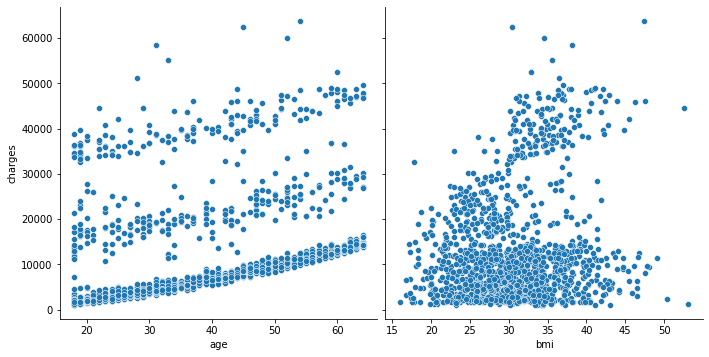

In [103]:
import seaborn as sns
sns.pairplot(data,x_vars=['age','bmi',],y_vars=['charges'],height=5)

In [104]:
x = data.drop(['sex','children','smoker','region','charges'], axis=1)
x.head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


In [105]:
y = data['charges']
y.shape


(1338,)

In [106]:
y = data['charges'].values.reshape(-1,1)
y.shape

(1338, 1)

In [107]:
from sklearn.preprocessing import StandardScaler
scalor = StandardScaler()
scalor.fit(y)
y = scalor.transform(y)

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [109]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
predict = reg.predict(x_test)
print(f"The various coefficients of the model are :- {reg.coef_}")
print(f"The intercept of the model are :- {reg.intercept_}")
print(f"The equation of the model is :- {reg.coef_[0][0]:.3}*y1 + {reg.coef_[0][1]:.3}*y2  + {reg.intercept_[0]:.3}")

The various coefficients of the model are :- [[0.01847043 0.02477957]]
The intercept of the model are :- [-1.48918635]
The equation of the model is :- 0.0185*y1 + 0.0248*y2  + -1.49


In [110]:
from sklearn.metrics import mean_absolute_error, mean_absolute_error

mae = mean_absolute_error(y_test, predict)
print(f"The mean square error of the model is :- {mae:.3}")
rmse = np.sqrt(mae)
print(f"The Root mean square error of the model is :- {rmse:.3}")
mae = mean_absolute_error(y_test, predict)
print(f"The Mean Absolute Error of the model is:- {mae:.3f} ")


The mean square error of the model is :- 0.741
The Root mean square error of the model is :- 0.861
The Mean Absolute Error of the model is:- 0.741 


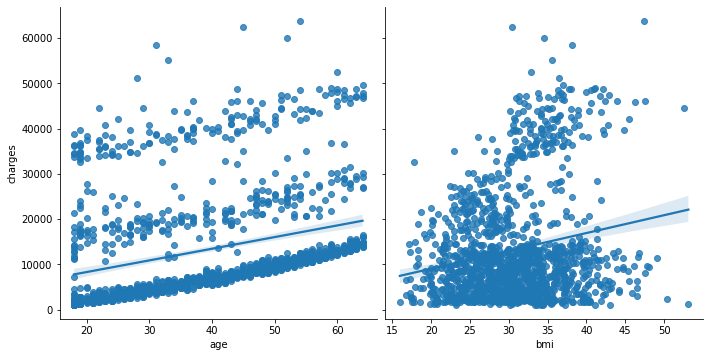

In [111]:
sns.pairplot(data, x_vars=['age', 'bmi', ], y_vars=['charges'], height=5,kind='reg')